# **PROYECTO CODERHOUSE: DIAGNOSTIC AIDS**

### Librerias utilizadas

In [199]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, classification_report, confusion_matrix, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.combine import SMOTETomek
from pyod.models.ecod import ECOD

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = 50

### Rutas y bases de datos
https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction/data  

In [200]:
# Obtener el dataframe desde el repsitorio de GitHub
data_aids = url = 'https://raw.githubusercontent.com/jhios98/data_science_fundamentals/main/AIDS_Classification_5000.csv'
data_aids = pd.read_csv(data_aids, sep=',' )

## **DATASET DIAGNOSTIC AIDS**
**Context:**  
Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS.
This dataset was initially published in 1996.

**Attribute Information:**  
**time:** time to failure or censoring  
**trt:** treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)  
**age:** age (yrs) at baseline  
**wtkg:** weight (kg) at baseline  
**hemo:** hemophilia (0=no, 1=yes)  
**homo:** homosexual activity (0=no, 1=yes)  
**drugs:** history of IV drug use (0=no, 1=yes)  
**karnof:** Karnofsky score (on a scale of 0-100)  
**oprior:** Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)  
**z30:** ZDV in the 30 days prior to 175 (0=no, 1=yes)  
**preanti:** days pre-175 anti-retroviral therapy  
**race:** race (0=White, 1=non-white)  
**gender:** gender (0=F, 1=M)  
**str2:** antiretroviral history (0=naive, 1=experienced)  
**strat:** antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)  
**symptom:** symptomatic indicator (0=asymp, 1=symp)   
**treat:** treatment indicator (0=ZDV only, 1=others)  
**offtrt:** indicator of off-trt before 96+/-5 weeks (0=no,1=yes)  
**cd40:** CD4 at baseline  
**cd420:** CD4 at 20+/-5 weeks  
**cd80:** CD8 at baseline  
**cd820:** CD8 at 20+/-5 weeks  
**infected:** is infected with AIDS (0=No, 1=Yes)  

**Additional Variable Information:**  
Personal information (age, weight, race, gender, sexual activity)  
Medical history (hemophilia, history of IV drugs)  
Treatment history (ZDV/non-ZDV treatment history)  
Lab results (CD4/CD8 counts)  

El conjunto de datos del estudio 175 del AIDS Clinical Trials Group contiene estadísticas de atención médica e información categórica sobre pacientes a los que se les ha diagnosticado SIDA. Este conjunto de datos se publicó inicialmente en 1996. El objetivo principal del proyecto es la utilización de la información del set para la predicción de infección del síndrome de inmunodeficiencia adquirida a partir de las diferentes variables principalmente de naturaleza categórica recolectada para 5000 individuos. Entre estas variables se tiene el peso del individuo ‘wtkg’, el tiempo en días antes de la insuficiencia hepática ‘time’, actividad homosexual ‘homo’, genero ‘gender’, raza ‘race’ entre otras. 

Dentro del análisis se espera determinar cuales son las variables que presentan una mayor correlación o incidencia en la determinación de la infección del SIDA para un paciente, también se espera evaluar si aquellas variables que a priori se pueden interpretar cómo generadoras o causales, como la actividad sexual del paciente o la utilización de drogas mediante la inyección, son en efecto las de mayor incidencia o estadísticamente significativas en la determinación de la infección.  Así mismo, se busca construir un modelo que permita predecir la probabilidad de infección a partir de un grupo de variables y medir la eficacia de este mediante la utilización de diferentes métricas. 

## **Preguntas e hipótesis:**

¿Cuáles variables (peso, tiempo antes de la insuficiencia hepática, actividad homosexual, género, raza, entre otras) presentan una mayor correlación con la infección del SIDA en el conjunto de datos del estudio 175?  
¿La actividad sexual (homo) y el uso de drogas mediante inyección tienen una incidencia significativa en la determinación de la infección del SIDA?  
¿Qué modelo predictivo (regresión logística, árboles de decisión, redes neuronales) es más eficaz para predecir la infección del SIDA a partir de las variables disponibles en el conjunto de datos?  
¿Cómo influyen los factores demográficos como género y raza en la probabilidad de infección del SIDA?  
¿Existe una combinación específica de variables que aumente significativamente la precisión de las predicciones sobre la infección del SIDA?

In [201]:
print(f'Dimensión del DataFrame {data_aids.shape}')
data_aids.columns

Dimensión del DataFrame (5000, 23)


Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [202]:
nulos = data_aids.isnull().sum()
print("Datos Nulos por variable")
nulos

Datos Nulos por variable


time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [203]:
print("Información general del Dataset")
data_aids.info()

Información general del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20

In [204]:
data_aids.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,881.382400,1.375200,34.239800,75.941660,0.033000,0.648000,0.137000,96.893400,0.040600,0.64020,318.906000,0.292200,0.850200,0.574400,1.94400,0.081400,0.730800,0.334200,319.791600,436.361600,1048.853000,906.292000,0.31580
std,303.774994,1.235609,6.985732,12.448553,0.178654,0.477642,0.343882,5.013608,0.197381,0.47999,401.655122,0.454819,0.356911,0.494483,0.89321,0.273476,0.443588,0.471757,102.370123,141.871757,491.375973,340.454917,0.46488
min,124.000000,0.000000,12.000000,44.424990,0.000000,0.000000,0.000000,78.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,115.000000,119.000000,252.000000,236.000000,0.00000
25%,552.000000,0.000000,29.000000,68.039777,0.000000,0.000000,0.000000,90.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,236.000000,325.000000,712.000000,649.000000,0.00000
50%,1044.500000,1.000000,34.000000,74.009940,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,135.000000,0.000000,1.000000,1.000000,2.00000,0.000000,1.000000,0.000000,298.000000,416.000000,891.000000,858.000000,0.00000
75%,1136.000000,3.000000,39.000000,81.224572,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,498.250000,1.000000,1.000000,1.000000,3.00000,0.000000,1.000000,1.000000,398.000000,526.000000,1243.250000,1075.000000,1.00000
max,1231.000000,3.000000,62.000000,142.881280,1.000000,1.000000,1.000000,100.000000,1.000000,1.00000,2351.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,716.000000,1104.000000,4922.000000,3055.000000,1.00000


En la tabla anterior es posible determinar que la mayoría de las variables son de tipo categórico, por lo que no se encuentra demasiada utilidad en el .describe(), es por ello por lo que a continuación se realiza una división por tipo de variable para su posterior análisis y recodificación. 

In [205]:
# Variables categóricas.
var_categ = ['trt','hemo','homo','drugs','oprior','z30','race','strat',
             'gender','str2','symptom','treat','infected','offtrt']

# Variables continuas.
var_continuas = ['time','age','wtkg','karnof','preanti',
                 'cd40','cd420','cd80','cd820']

In [206]:
data_aids[var_continuas].describe()

,time,age,wtkg,karnof,preanti,cd40,cd420,cd80,cd820
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,881.382400,34.239800,75.941660,96.893400,318.906000,319.791600,436.361600,1048.853000,906.292000
std,303.774994,6.985732,12.448553,5.013608,401.655122,102.370123,141.871757,491.375973,340.454917
min,124.000000,12.000000,44.424990,78.000000,0.000000,115.000000,119.000000,252.000000,236.000000
25%,552.000000,29.000000,68.039777,90.000000,0.000000,236.000000,325.000000,712.000000,649.000000
50%,1044.500000,34.000000,74.009940,100.000000,135.000000,298.000000,416.000000,891.000000,858.000000
75%,1136.000000,39.000000,81.224572,100.000000,498.250000,398.000000,526.000000,1243.250000,1075.000000
max,1231.000000,62.000000,142.881280,100.000000,2351.000000,716.000000,1104.000000,4922.000000,3055.000000


In [207]:
value_counts_dict = {}

for var in var_categ:
    value_counts_dict[var] = data_aids[var].value_counts()

value_counts_df = pd.DataFrame(value_counts_dict)
value_counts_df.fillna(0)

,trt,hemo,homo,drugs,oprior,z30,race,strat,gender,str2,symptom,treat,infected,offtrt
0,1885,4835.0,1760.0,4315.0,4797.0,1799.0,3539.0,0.0,749.0,2128.0,4593.0,1346.0,3421.0,3329.0
1,699,165.0,3240.0,685.0,203.0,3201.0,1461.0,2142.0,4251.0,2872.0,407.0,3654.0,1579.0,1671.0
2,1071,0.0,0.0,0.0,0.0,0.0,0.0,996.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1345,0.0,0.0,0.0,0.0,0.0,0.0,1862.0,0.0,0.0,0.0,0.0,0.0,0.0


Al revisar el resumen estadístico de las variables continuas se encuentra que las para la edad, el peso y la puntuación de Karnofsky (es la forma típica de medir la capacidad de los pacientes de realizar tareas rutinarias. Los puntajes de la escala de rendimiento de Karnofsky oscilan entre 0 y 100. Esta es una herramienta utilizada para medir la calidad de vida y la capacidad funcional de los pacientes con enfermedades graves, incluyendo aquellos con SIDA) no presentan variaciones significativas, es decir, la desviación estándar para estas variables no es muy grande, sin embargo, para variables como el tiempo antes de la insuficiencia hepática, los días previos a la terapia antirretroviral 175 y la cantidad de linfocitos T (cd4 y cd8) presentan valores mucho más altos 

## **EDA EXPLORATORY DATA ANALYTICS**
### **COUNPLOT VARIABLES CATEGÓRICAS**

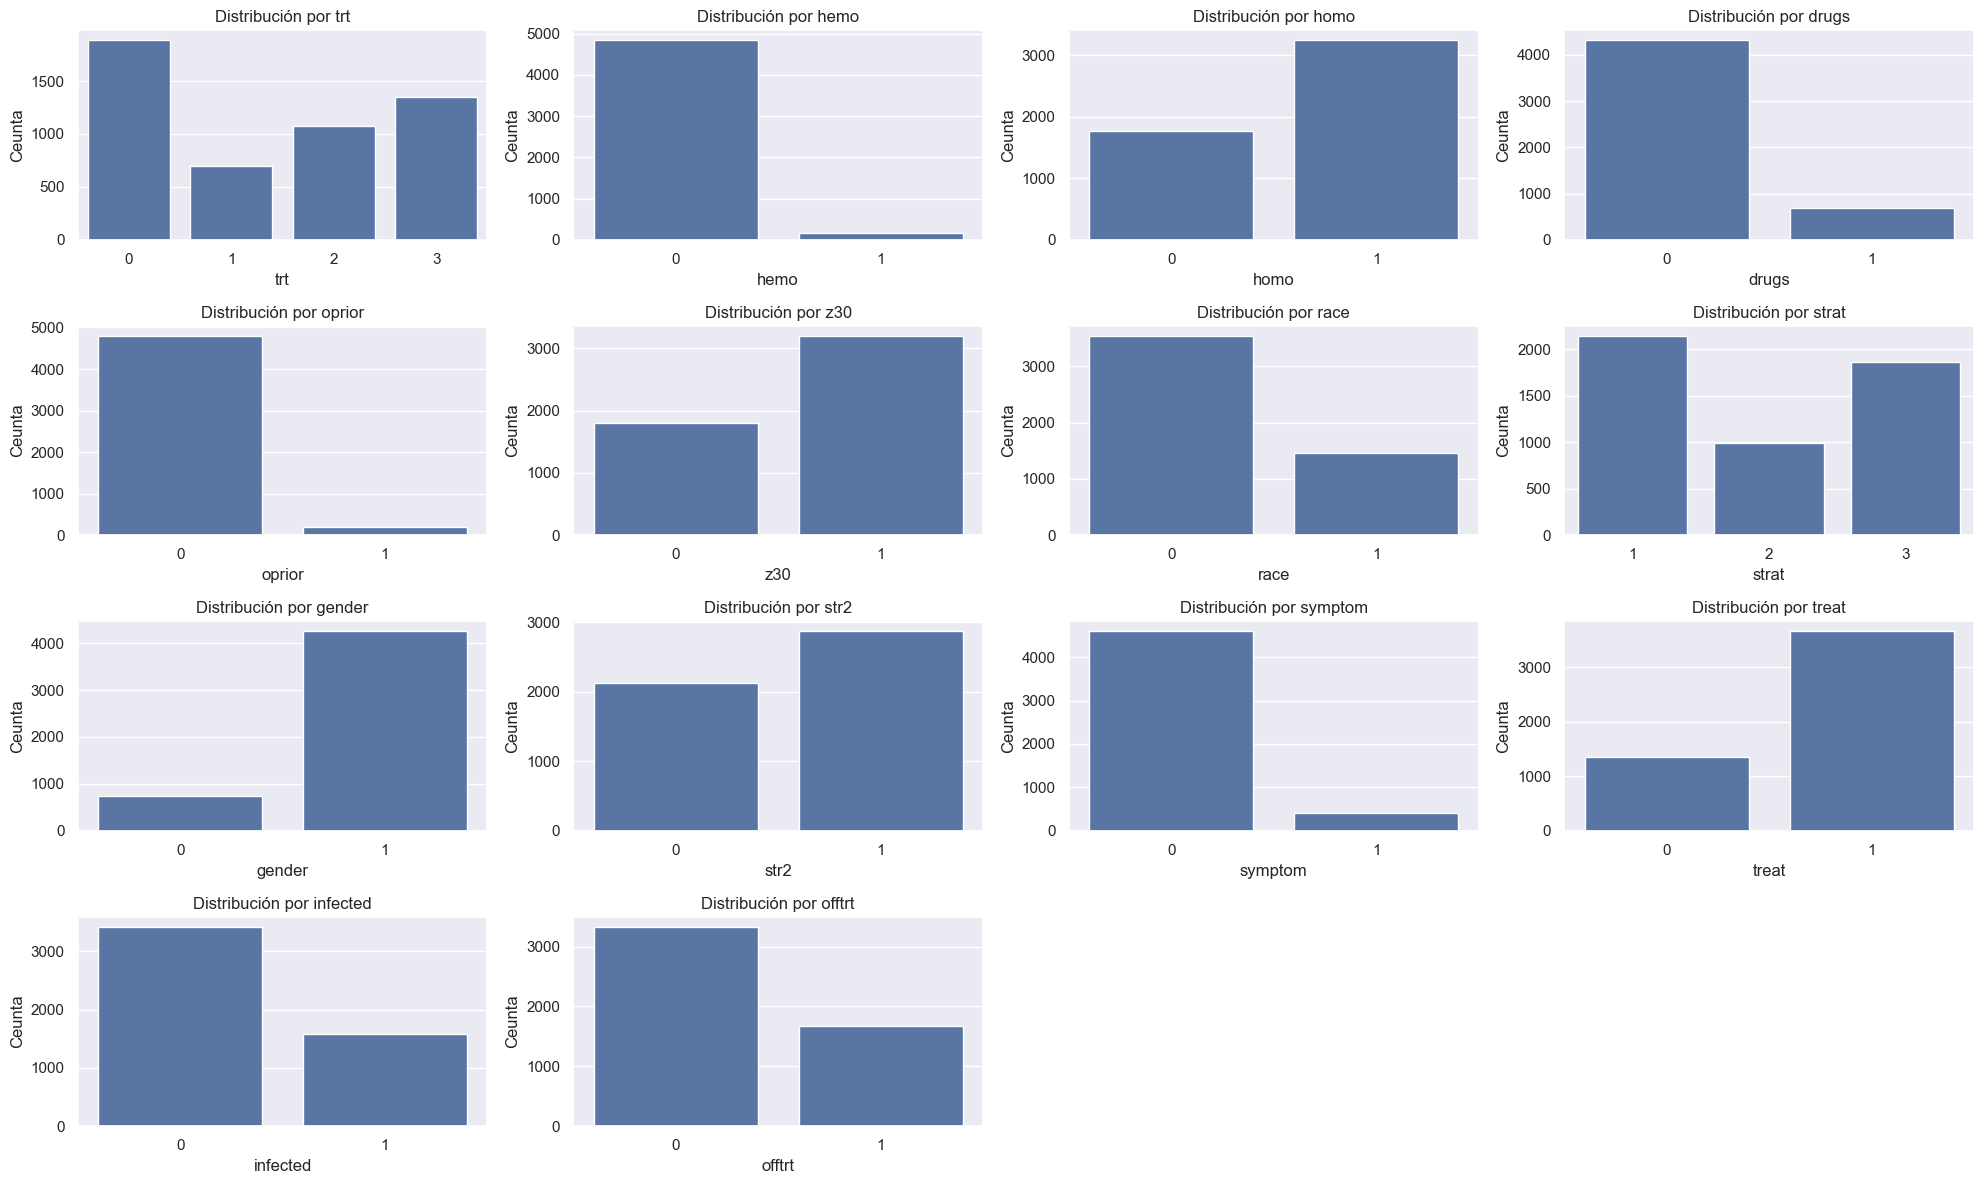

In [208]:
num_vars = len(var_categ)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

sns.set(style="darkgrid")
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))
axes = axes.flatten()

for i, var in enumerate(var_categ):
    sns.countplot(data=data_aids, x=var, ax=axes[i])
    axes[i].set_title(f'Distribución por {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Ceunta')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En el apartado anterior, mediante un ciclo for, se realiza un gráfico de barras para cada una de las variables categóricas y se imprime dentro del mismo plot. Aquí se evidencia que, a diferencia de las variables 'strat', 'strat2' y 'trt', las demás características presentan una marcada concentración en algunas categorías en particular. En las variables 'symtom', 'hemo' y 'oprior' se muestra una muy alta concentración en la categoría 0, lo que se traduce en un fuerte desequilibrio y probables incidencias de sesgo en las predicciones. También se evidencia que, para la variable objetivo del análisis 'infected', se encuentra un problema de desbalanceo, donde predominan los casos de infección negativa, lo que también puede significar un problema en el entrenamiento de algún tipo de modelo.

### **HISTOGRAMAS VARIABLES CONTINUAS**

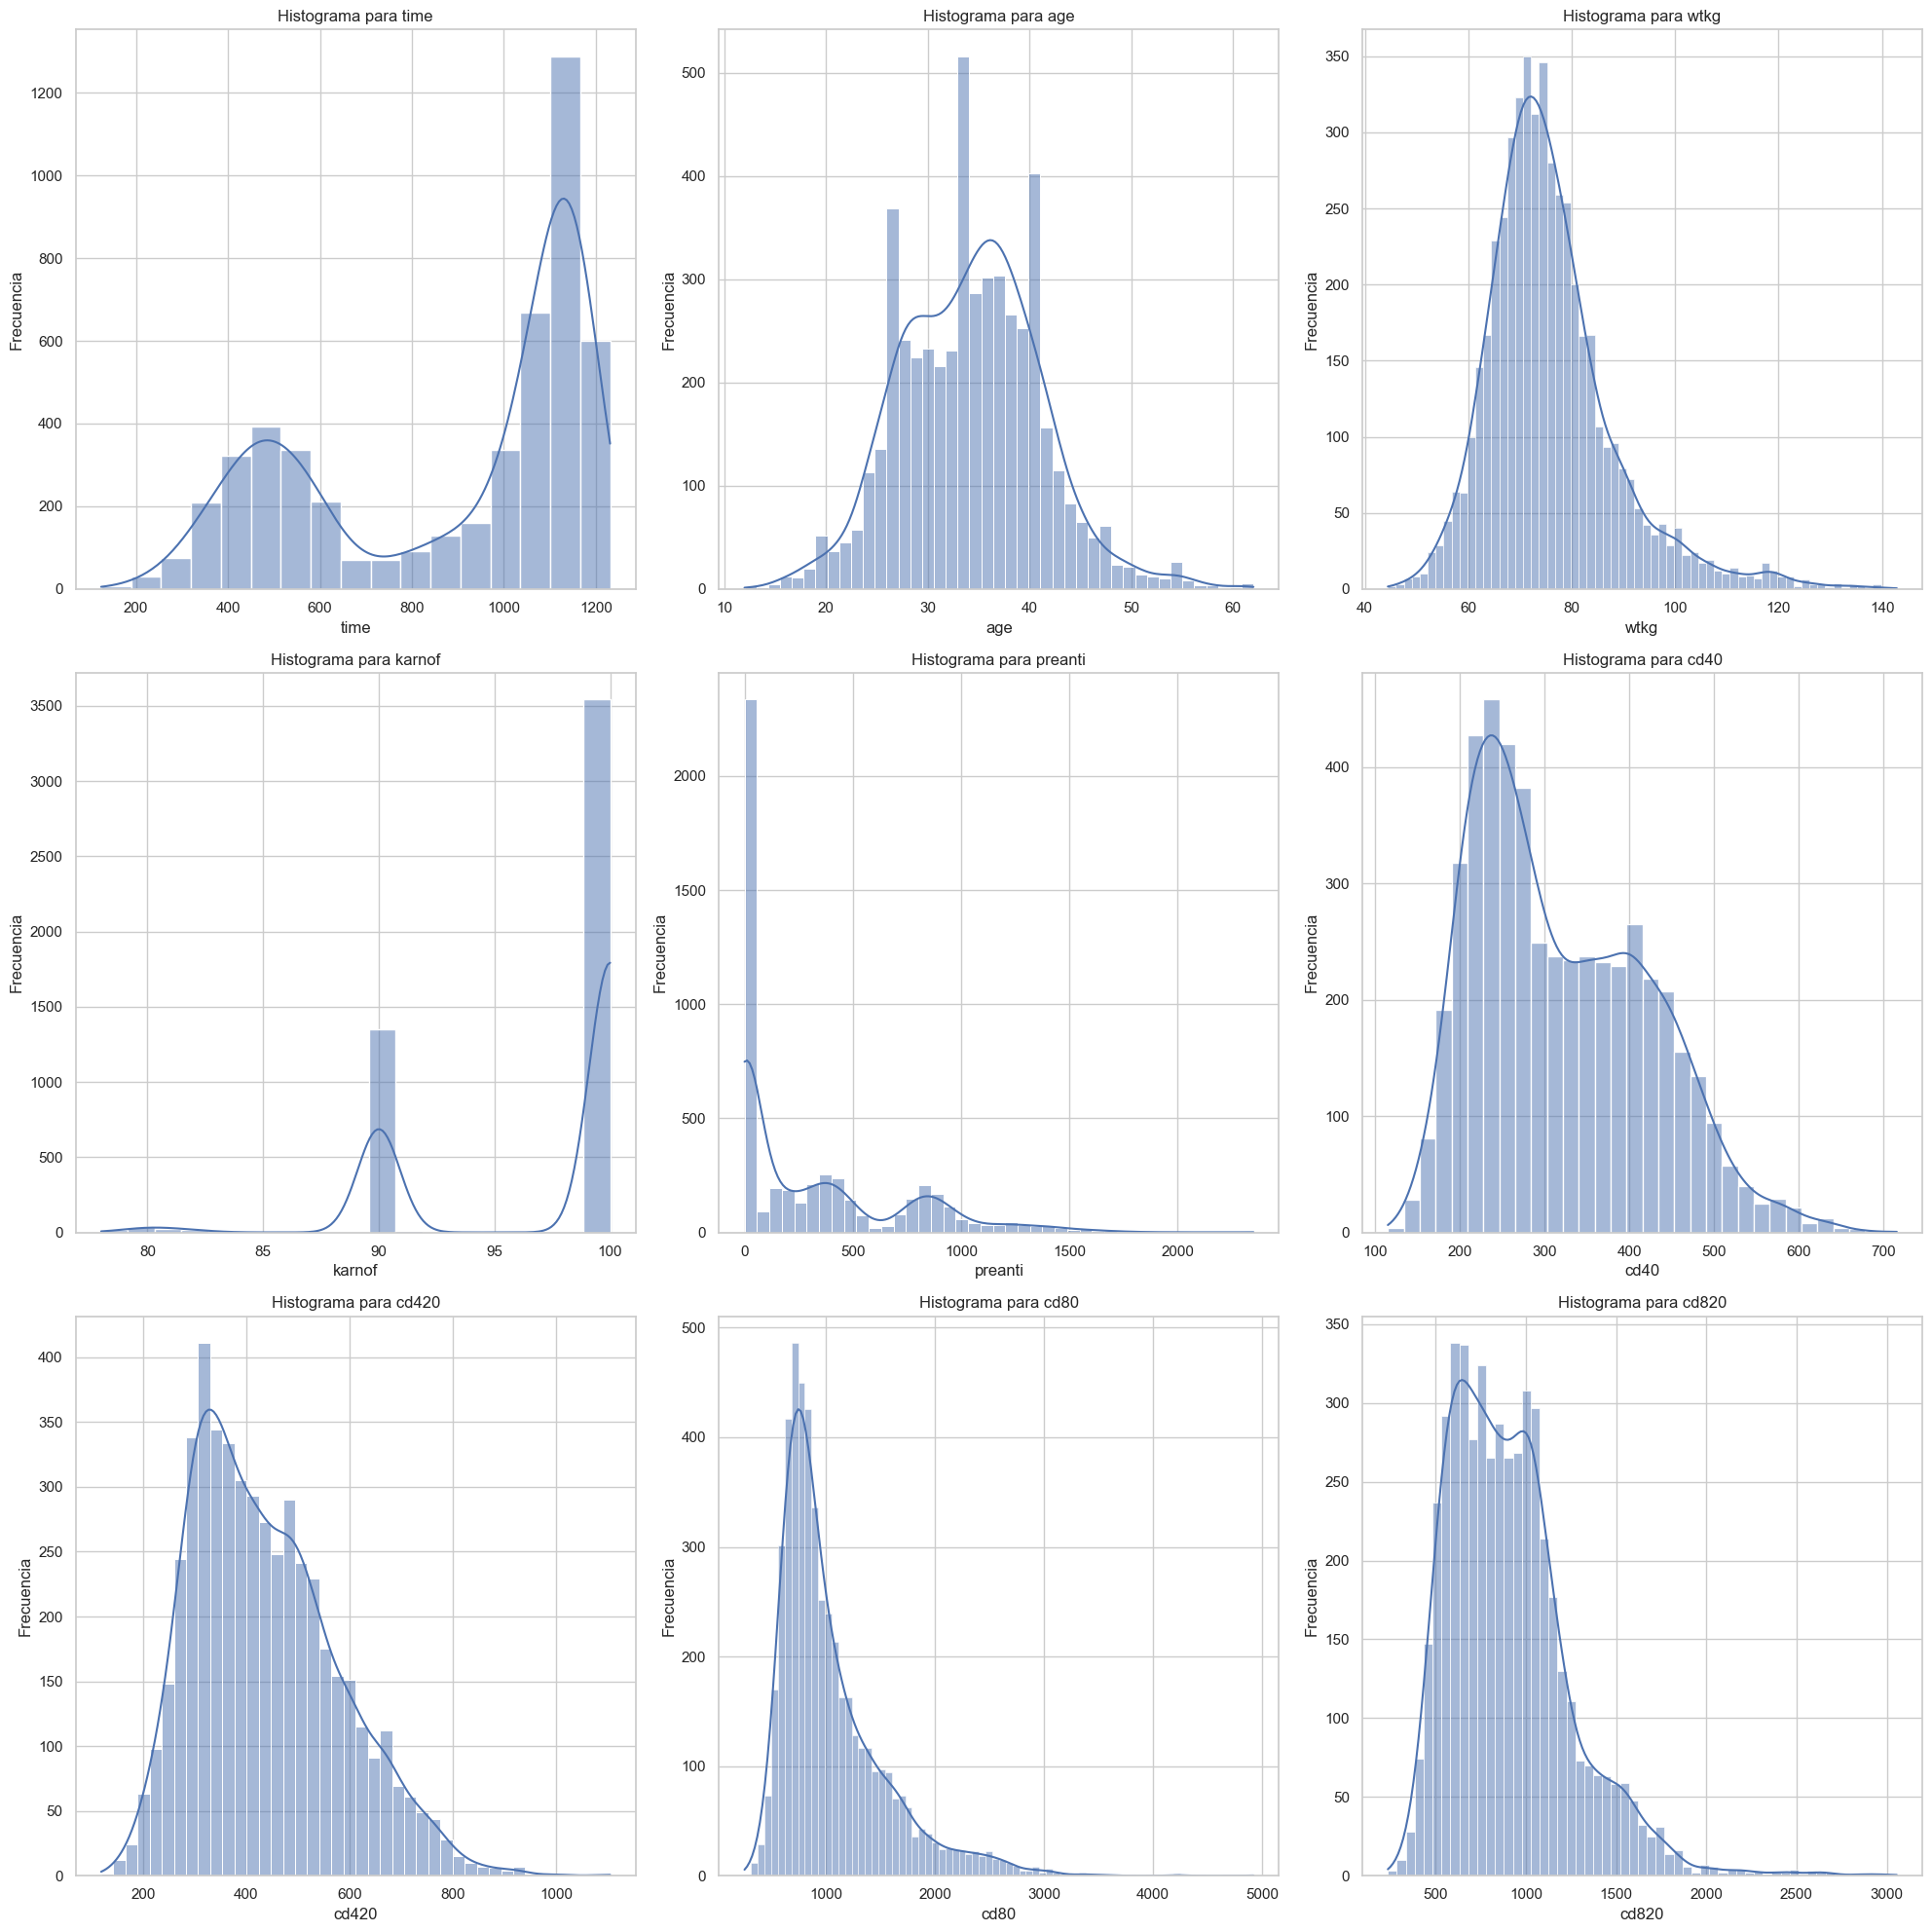

In [209]:
num_vars = len(var_continuas)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

# Iterar sobre las variables continuas y crear un histograma para cada una
for i, var in enumerate(var_continuas):
    sns.histplot(data=data_aids, x=var, ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma para {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes no utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar la superposición
plt.tight_layout()

# Mostrar el plot
plt.show()

En este apartado se realiza un histograma para cada una de las variables continuas del conjunto de datos. Aquí se logra identificar que la variable 'age' presenta un apuntalamiento o concentración entre los 30 y 40 años, mientras que el peso se encuentra concentrado entre los valores de 70 a 80 kilogramos. La variable 'time' no tiene un único intervalo de concentración, pero sí uno visualmente mayor entre los 1000 y 1200 días. La variable 'karnof' tiene concentraciones muy marcadas en los valores de 90 y 10, y algunos registros alrededor de 80 puntos, mientras que la variable 'preanti' está muy acentuada en 0. Para las variables de la cantidad de linfocitos, se logra evidenciar de manera general un apuntalamiento entre los valores bajos y medios con algunos registros muy altos, lo que permite visualizar una asimetría positiva de las distribuciones. De manera global, es posible determinar que las variables no siguen una distribución normal y, por ende, presentan marcadas asimetrías.

A continuación, se realiza la misma grafica de histogramas con la diferencia que se añade las categorías de 'infected', sin embargo, no se evidencian grandes diferencias en la distribución de los datos de acuerdo a las categorías de la variable objetivo. 

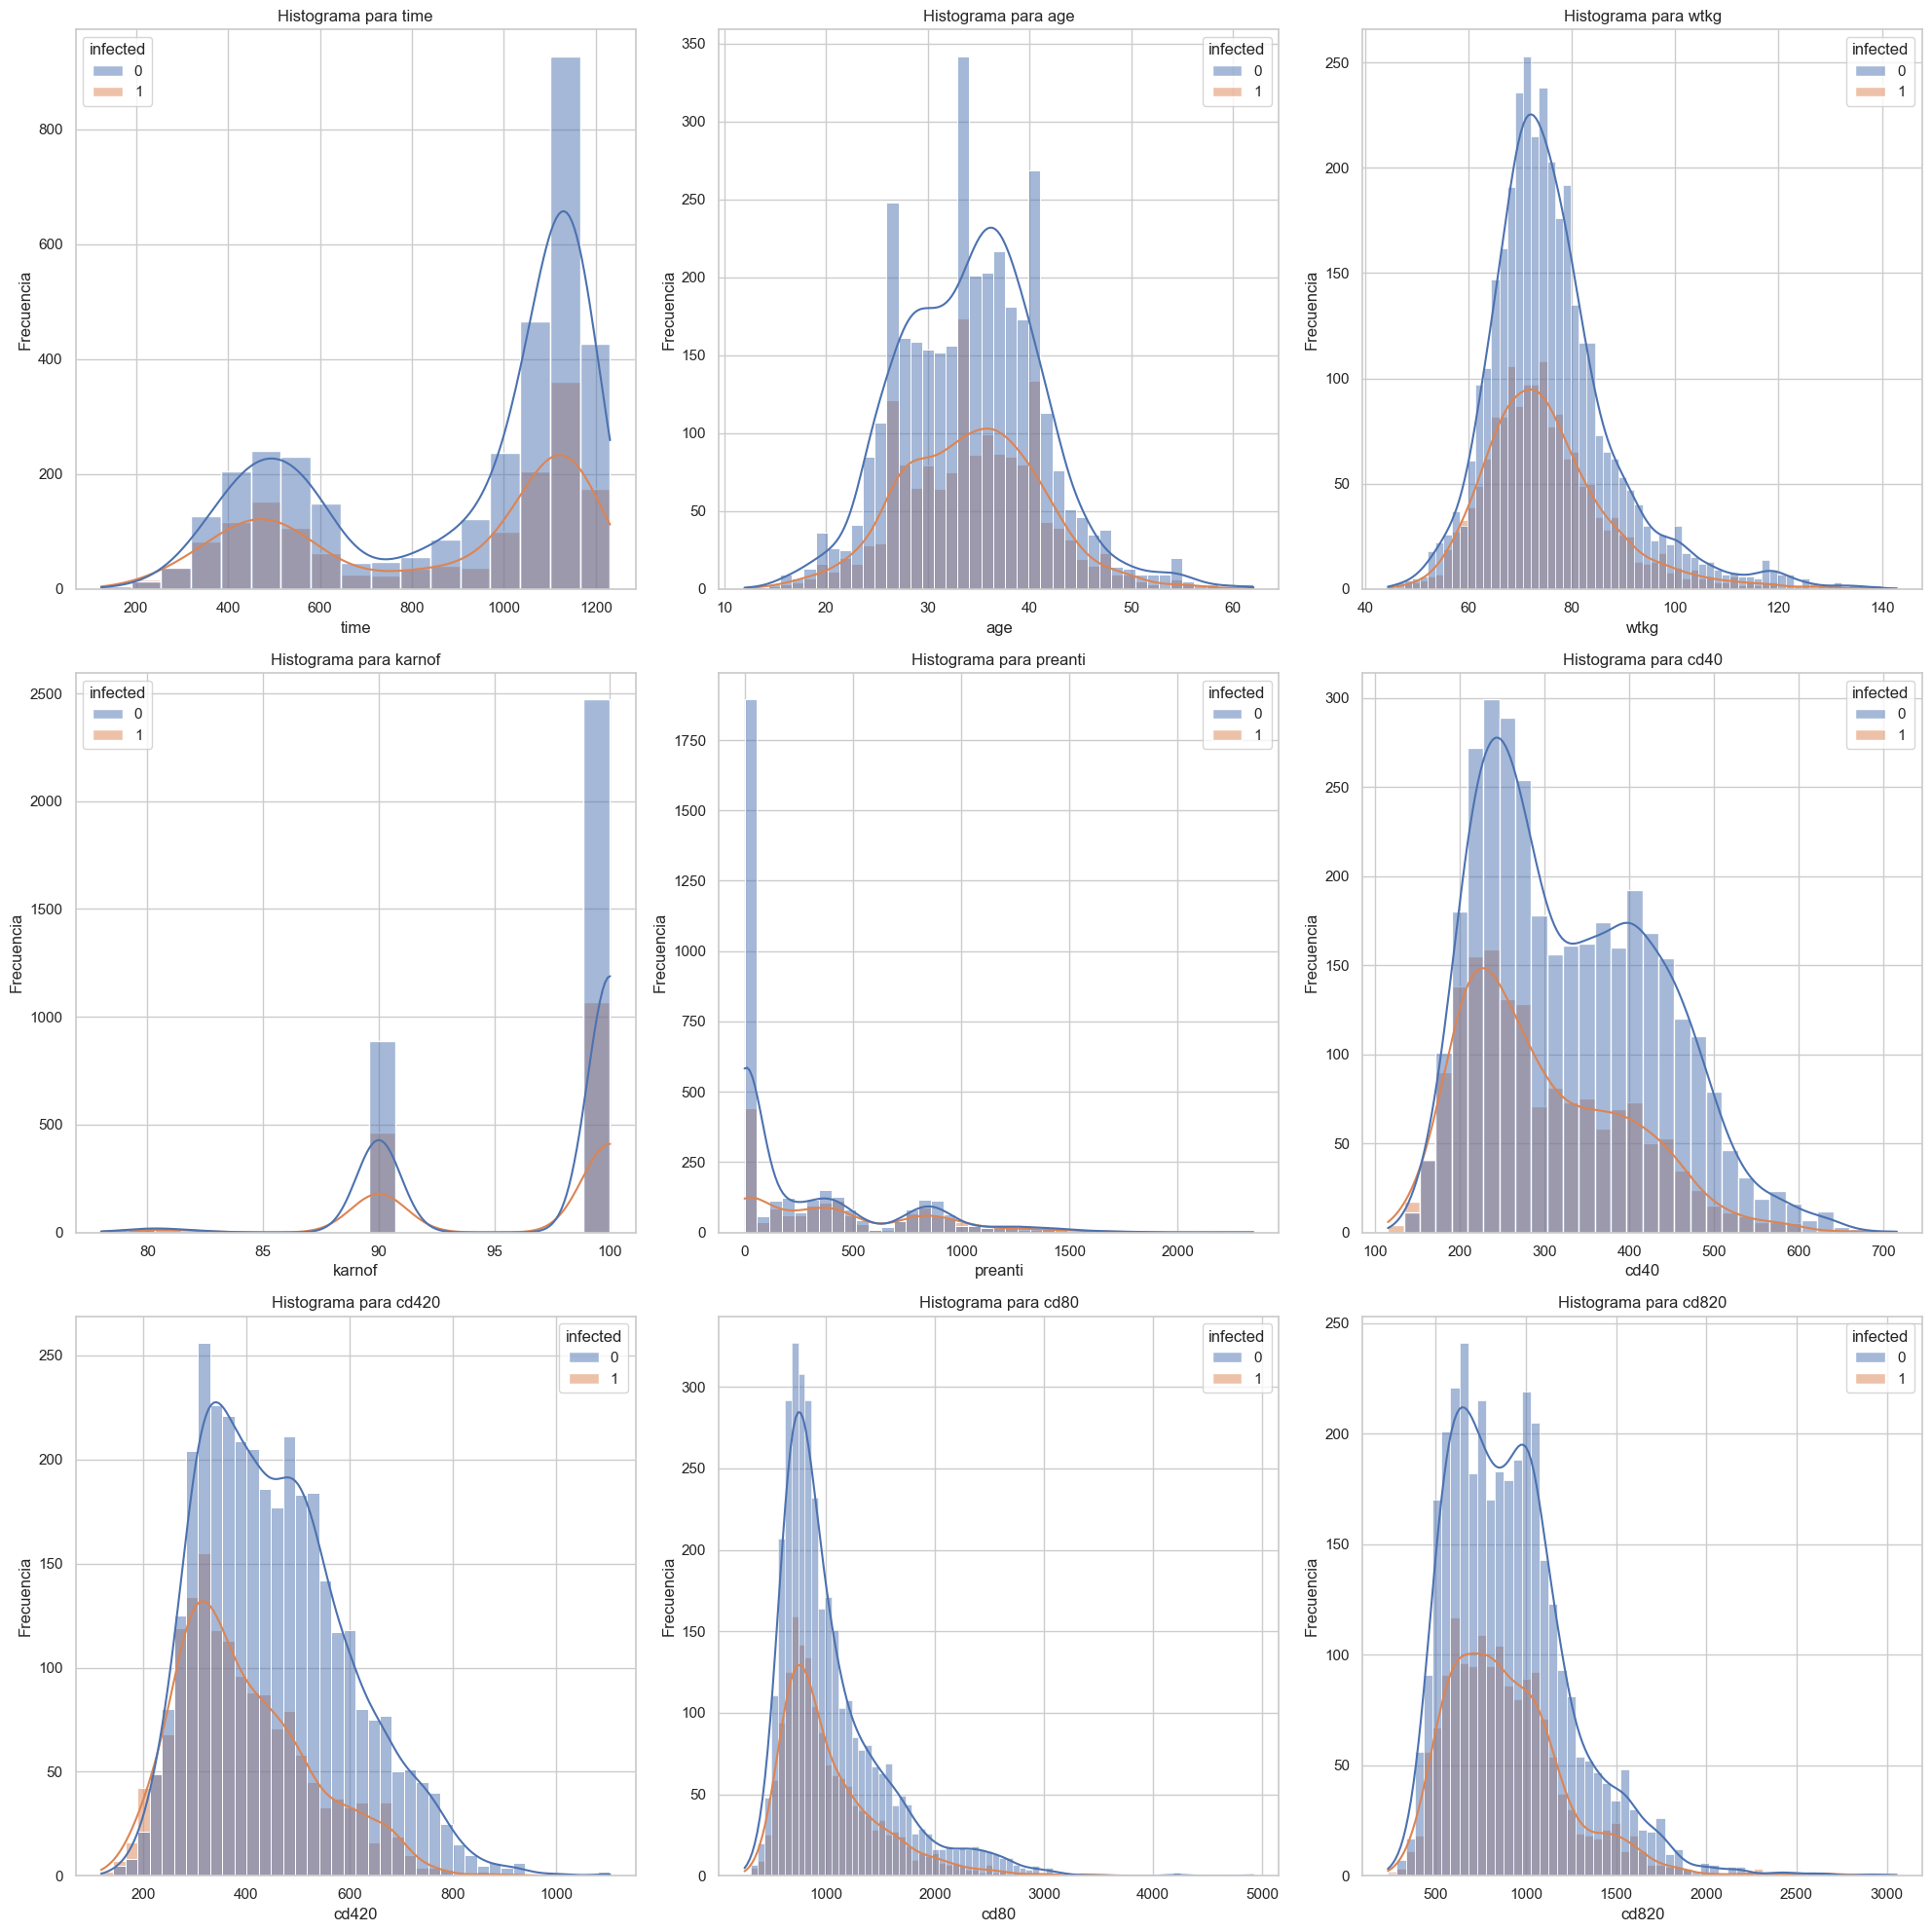

In [210]:
num_vars = len(var_continuas)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for i, var in enumerate(var_continuas):
    sns.histplot(data=data_aids,hue='infected', x=var, ax=axes[i], kde=True)
    axes[i].set_title(f'Histograma para {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

### **BOXPLOTS VARIABLES CONTINUAS POR VALOR DE INFECCION (1= INFECTADO, 0 = nO INFECTADO)**

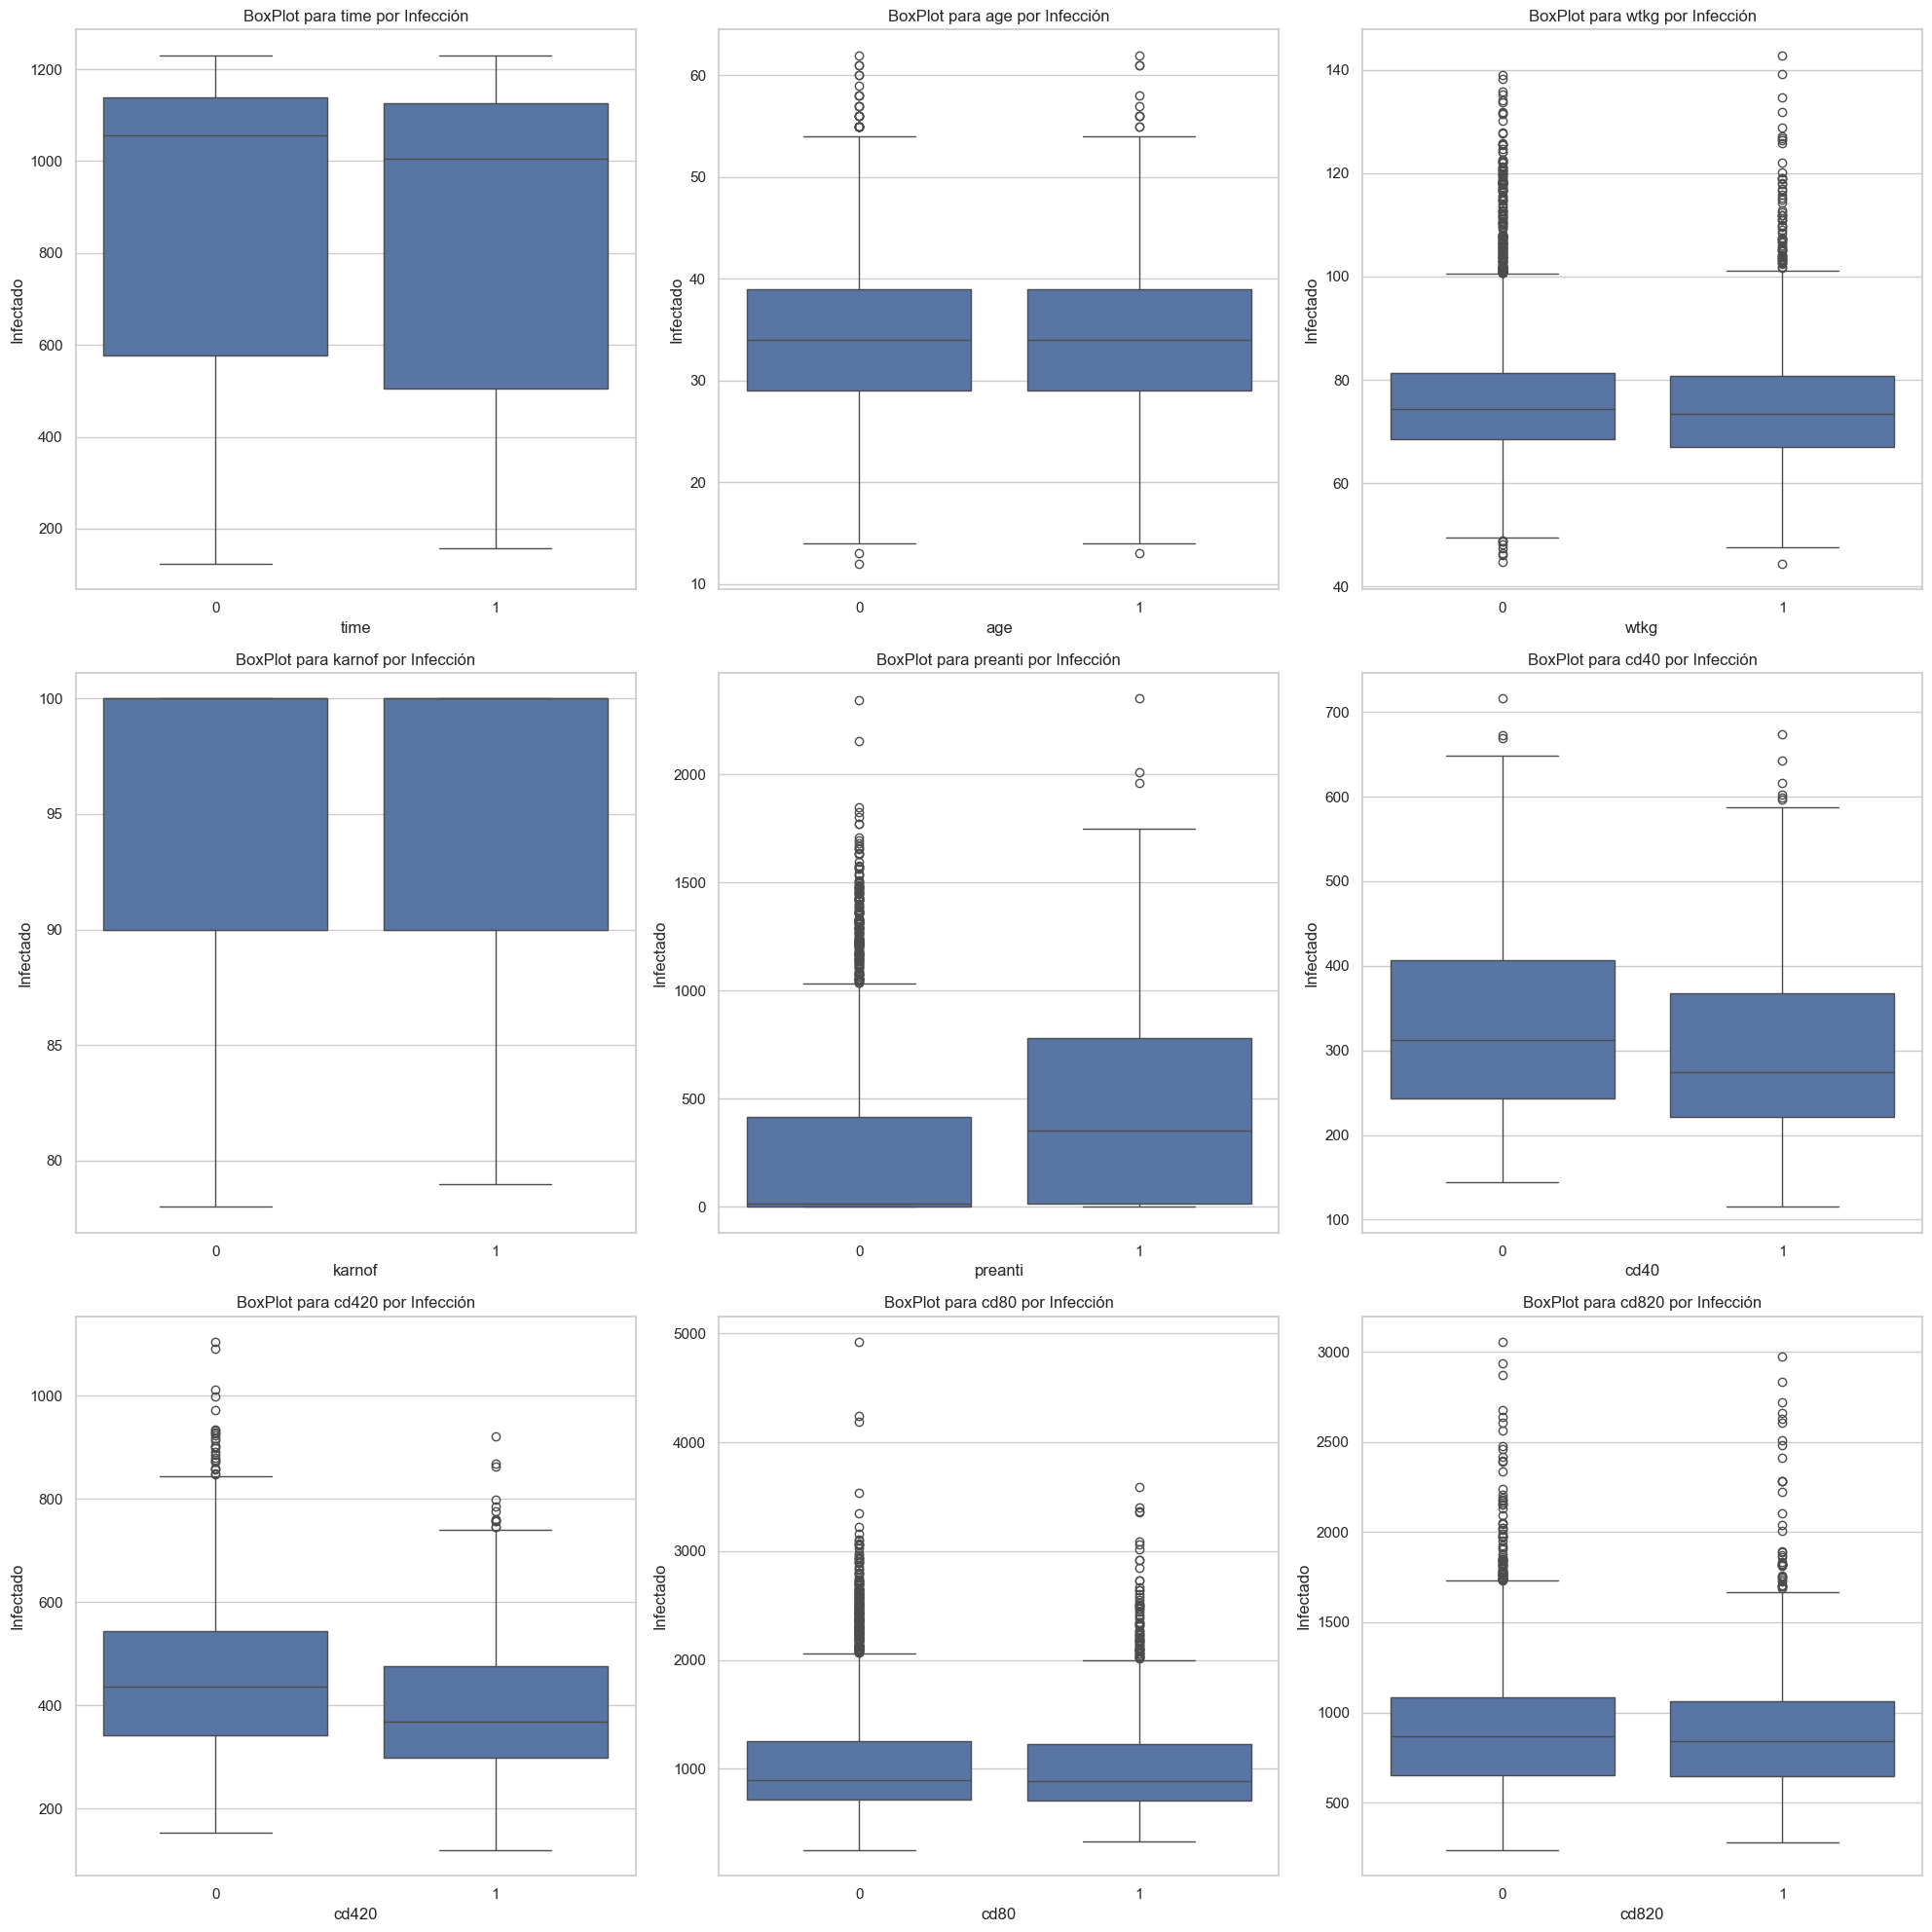

In [211]:
num_vars = len(var_continuas)
ncols = math.ceil(math.sqrt(num_vars))
nrows = math.ceil(num_vars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
axes = axes.flatten()

for i, var in enumerate(var_continuas):
    sns.boxplot(data=data_aids, y=var , x='infected', ax=axes[i])
    axes[i].set_title(f'BoxPlot para {var} por Infección')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Infectado')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

Adicional a los histogramas, se realiza un gráfico con las variables continuas por las categorías de la variable 'infected', donde se logra evidenciar que, para algunas de ellas, a priori no se observa una diferencia marcada en su distribución. Por lo tanto, se podrían aplicar pruebas de hipótesis para la diferencia de medias de cada grupo y determinar su significancia estadística. Entre estas variables se encuentran 'cd80', 'wtkg' y 'age'.

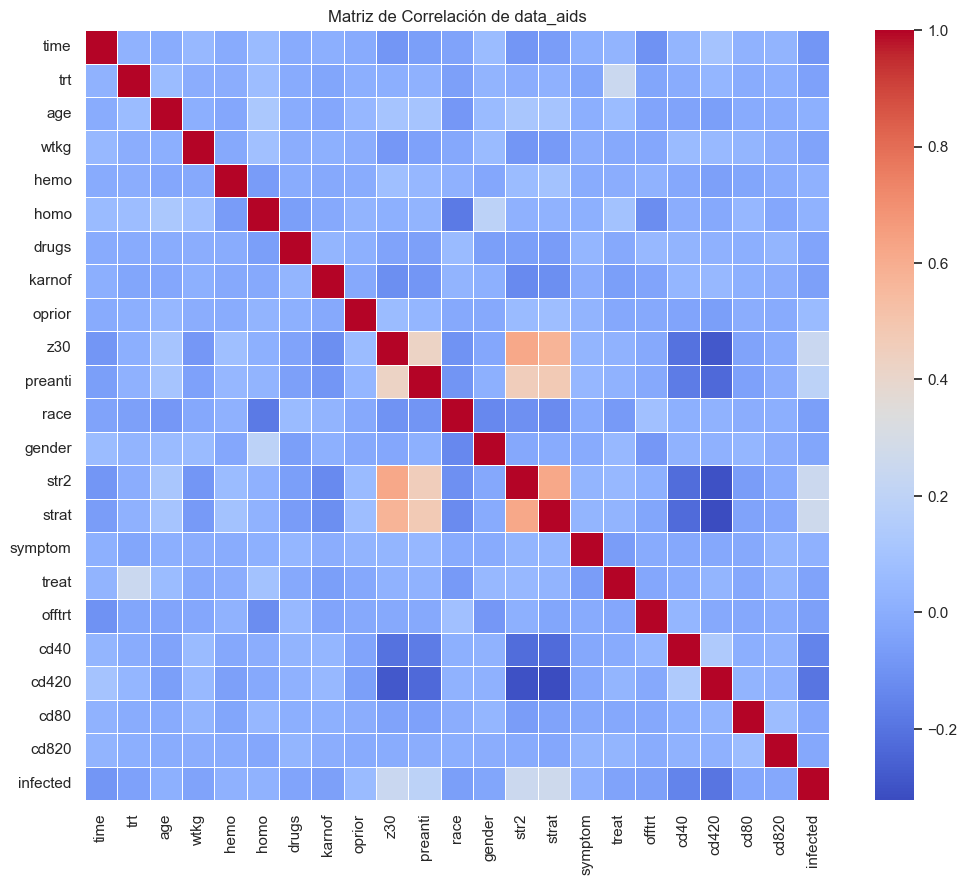

In [212]:
correlation_matrix = data_aids.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de data_aids')
plt.show()

## **TRATAMIENTO DE ATIPICOS**

ECOD (Empirical-Cumulative-distribution-based Outlier Detection), que se inspira en el hecho de que los valores atípicos son a menudo los "eventos raros" que aparecen en las colas de una distribución. En pocas palabras, ECOD primero estima la distribución subyacente de los datos de entrada de una manera no paramétrica al calcular la distribución acumulativa empírica por dimensión de los datos. ECOD luego usa estas distribuciones empíricas para estimar las probabilidades de cola por dimensión para cada punto de datos. Finalmente, ECOD calcula una puntuación de valor atípico de cada punto de datos agregando las probabilidades de cola estimadas en todas las dimensiones.  
ECOD es un método no paramétrico, lo que significa que no hace suposiciones específicas sobre la distribución de los datos. La sensibilidad del modelo se puede ajustar mediante el parámetro de contaminación, permitiendo controlar la proporción de outliers detectados.

In [213]:
def eliminar_outliers(df, list_vars):
    clf = ECOD(contamination=0.01, n_jobs=1)
    list_arrays = []

    for var in list_vars:
        X = df[var].values.reshape(-1, 1)
        clf.fit(X)
        y = clf.labels_
        array = np.c_[X,y]
        median = np.quantile(array, 0.5)
        outlier = np.where(((array[:,0]>median) & (y==1)), 1, 0)
        list_arrays.append(outlier)

    arr = np.stack(list_arrays, axis=1)
    outliers = np.sum(arr, axis=1) 
    df = df[outliers == 0]
    
    df.reset_index(drop=True, inplace=True)
    
    return df


data_aids = eliminar_outliers(data_aids, var_continuas)

## **FEATURE SELECCION & MODELOS**

Para limpiar el conjunto de datos y reducir la dimensionalidad, se aplica un método de selección de características específico para cada modelo que se utilizará. En este caso, se utiliza el Sequential Feature Selector (SFS), una técnica que selecciona un subconjunto de características más relevantes para el modelo. El SFS puede realizarse de manera forward (hacia adelante) o backward (hacia atrás). Para nuestro problema de clasificación, que se basa en variables principalmente categóricas relacionadas con el estado de salud, se han elegido tres modelos enfocados en problemas de clasificación:

**RandomForest:** Este modelo se aplica debido a su robustez y versatilidad en la clasificación. Es capaz de manejar espacios de características de alta dimensión y proporciona información sobre la importancia de las características. Además, el RandomForest es eficaz en mantener una alta precisión predictiva y minimizar el sobreajuste, lo que es crucial para problemas de clasificación como el nuestro.  

**LogisticRegression:** La regresión logística es ampliamente utilizada para problemas de clasificación binaria, como la predicción de infección por VIH/SIDA. Su simplicidad y eficiencia computacional permiten una interpretación clara y rápida de los resultados. La regresión logística es adecuada para nuestro caso porque maneja bien las variables binarias y ofrece una buena base para comparar con otros modelos.

**KNeighborsClassifier:** Se utiliza el modelo de vecinos más cercanos para clasificar a los pacientes entre infectados y no infectados. Este modelo calcula la distancia entre la instancia y todos los puntos en el conjunto de entrenamiento, sin hacer suposiciones sobre la distribución de los datos, lo cual es útil en nuestro caso, dado que el conjunto de datos no sigue una distribución normal. Sin embargo, el KNeighborsClassifier puede verse afectado por el desbalance de clases, especialmente si hay una mayoría significativa de pacientes no infectados.

In [214]:
target = data_aids['infected']
features = data_aids.drop(columns=['infected'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### **RandomForestClassifier**

In [215]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

sfs = SFS(rf, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train, y_train)

selected_features = list(sfs.k_feature_names_)
print(selected_features)


['time', 'trt', 'age', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80']


### **LogisticRegression**

In [216]:
logreg = LogisticRegression()

sfs = SFS(logreg,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

selected_features_logreg = list(sfs.k_feature_names_)
print(selected_features_logreg)

['age', 'wtkg', 'hemo', 'drugs', 'race', 'strat', 'symptom', 'treat', 'cd420']


### **KNeighborsClassifier**

In [217]:
knn = KNeighborsClassifier()

sfs = SFS(knn,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5,
          n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

selected_features = list(sfs.k_feature_names_)
print(selected_features)

['oprior', 'treat']


## **APLICACIÓN DE MODELOS**

Dado que el análisis exploratorio de datos (EDA) revela que el conjunto de datos presenta un desbalance entre las etiquetas de "infectado" y "no infectado", esto puede afectar la aplicación de algoritmos de clasificación, ya que estos algoritmos tienden a aprender y clasificar mejor la clase mayoritaria, mientras que la clase minoritaria puede ser subestimada. Para abordar este problema y mejorar la eficiencia de los algoritmos, se emplea una técnica de balanceo llamada SMOTETomek. Esta técnica combina dos métodos para manejar el desbalance de clases en el aprendizaje automático:

SMOTE (Synthetic Minority Over-sampling Technique):  
SMOTE genera nuevas instancias sintéticas de la clase minoritaria al interpolar entre ejemplos existentes. Para ello, toma puntos cercanos y crea nuevos puntos a lo largo de la línea que los conecta, aumentando así la representación de la clase minoritaria.  

Tomek Links:  
Tomek Links identifica y elimina pares de instancias (una de cada clase) que son más cercanas entre sí que cualquier otro par de instancias de diferente clase. Este proceso ayuda a limpiar los datos al eliminar ejemplos que podrían estar causando confusión en el modelo debido a su proximidad con instancias de la clase opuesta.


A continuación, cad auno de los códigos prepara y evalúa cada uno de los kodelos escogidos para clasificar infecciones de VIH/SIDA. Primero, divide el conjunto de datos en entrenamiento y prueba. Luego, aplica SMOTETomek para balancear las clases, seguido de la normalización de características con MinMaxScaler. Utiliza GridSearchCV para ajustar hiperparámetros del modelo, optimizando según la precisión. El modelo entrenado se evalúa en el conjunto de prueba, generando una matriz de confusión y un informe de clasificación con métricas como precisión y recall. Finalmente, visualiza la matriz de confusión con un heatmap.

### **LogisticRegression**


              precision    recall  f1-score   support

           0       0.70      0.90      0.79       945
           1       0.48      0.20      0.28       444

    accuracy                           0.68      1389
   macro avg       0.59      0.55      0.53      1389
weighted avg       0.63      0.68      0.63      1389



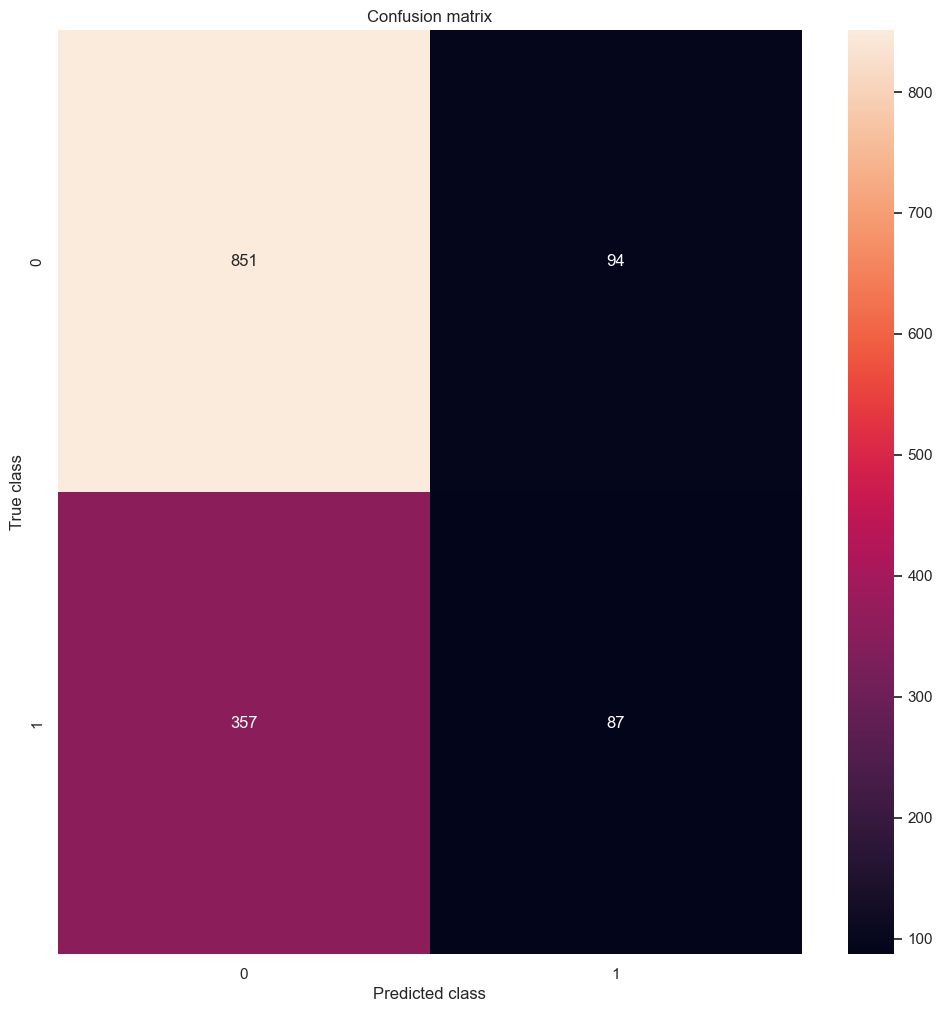

In [218]:
target = data_aids['infected']
features = data_aids[['time', 'trt', 'age', 'drugs', 'z30', 'str2', 'strat', 'offtrt', 'cd40', 'cd420', 'cd820']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

os_us = SMOTETomek(sampling_strategy=0.5)
X_train, y_train = os_us.fit_resample(X_train, y_train)

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)


params = {'fit_intercept': [True, False]}

score_metrics = {'f1': 'f1',
                 'accuracy': 'accuracy',
                 'recall': 'recall'}

clf = GridSearchCV(estimator=LogisticRegression(),
                   param_grid=params,
                   scoring=score_metrics,
                   refit='accuracy', 
                   cv=5,
                   n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


Los resultados de la regresión logística muestran un accuracy general del 68%, indicando que el modelo clasifica correctamente el 68% de los casos en el conjunto de prueba. Para la clase "0" (no infectado), la precisión es 70% y el recall es 90%, lo que significa que el modelo tiene una buena capacidad para identificar correctamente los casos no infectados y es menos propenso a errores en esta clase. Sin embargo, para la clase "1" (infectado), la precisión es solo 48% y el recall es 20%, lo que indica que el modelo tiene dificultades para identificar correctamente los casos infectados y tiende a perder muchos casos positivos. El f1-score de 0.28 para la clase "1" resalta un bajo equilibrio entre precisión y recall para esta clase. El promedio ponderado y macro muestran una capacidad moderada del modelo, con mejores resultados para la clase mayoritaria.

### **RandomForestClassifier**

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       945
           1       0.48      0.20      0.28       444

    accuracy                           0.68      1389
   macro avg       0.59      0.55      0.53      1389
weighted avg       0.63      0.68      0.63      1389



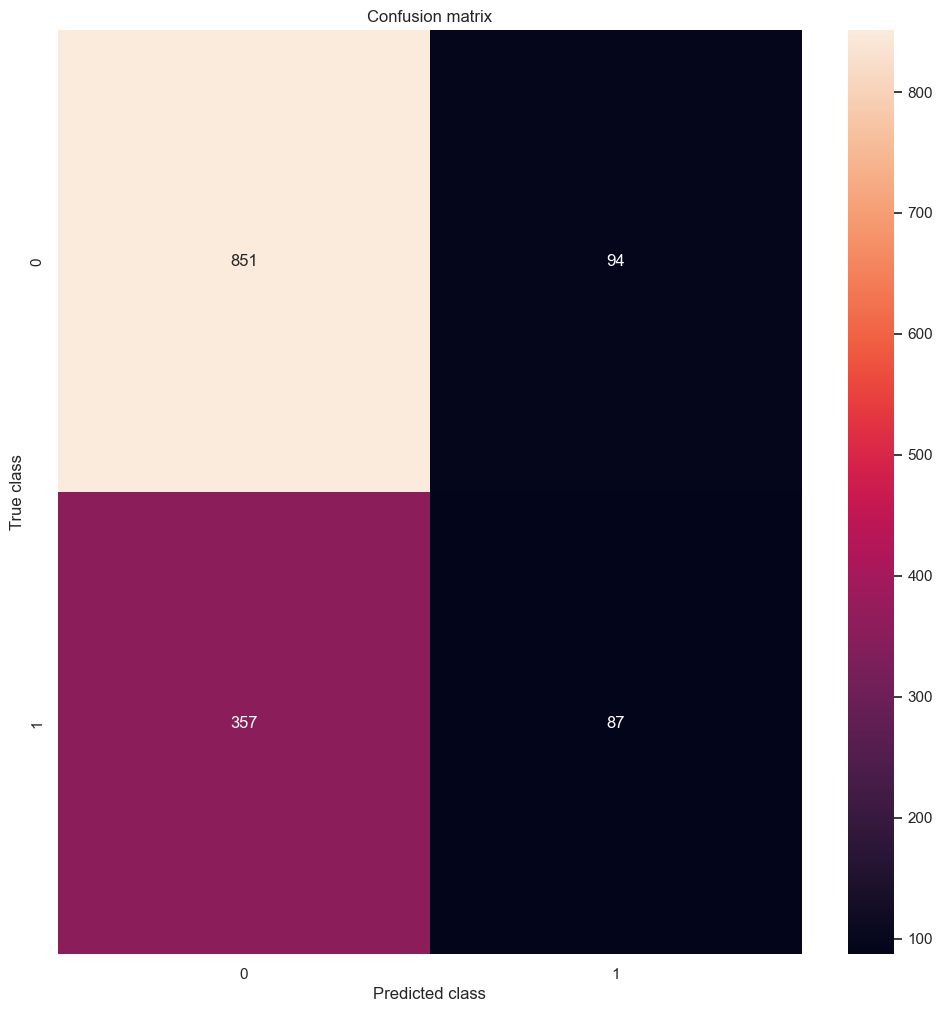

In [219]:
target = data_aids['infected']
features = data_aids[['time', 'trt', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'gender', 'str2', 'strat', 'symptom', 'offtrt', 'cd40', 'cd420', 'cd820']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


os_us = SMOTETomek(sampling_strategy=0.5)
X_train, y_train = os_us.fit_resample(X_train, y_train)

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

score_metrics = {'f1': 'f1',
                 'accuracy': 'accuracy',
                 'recall': 'recall'}

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_grid=param_grid,
                   scoring=score_metrics,
                   refit='accuracy',
                   cv=5,
                   n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)


# Reporte completo
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


Los resultados para el modelo RandomForestClassifier muestran un accuracy general del 68%, indicando que el modelo clasifica correctamente el 68% de los casos en el conjunto de prueba. Para la clase "0" (no infectado), el modelo tiene una precisión del 70% y un recall del 90%, lo que significa que identifica bien los casos no infectados y tiene una buena tasa de detección para esta clase. Para la clase "1" (infectado), la precisión es 48% y el recall es 20%, indicando que el modelo lucha para identificar correctamente los casos infectados y tiene un alto número de falsos negativos. El f1-score para la clase "1" es 0.28, reflejando un bajo equilibrio entre precisión y recall para la clase minoritaria. El promedio macro y ponderado muestran una capacidad moderada del modelo, con mejores resultados para la clase mayoritaria.

### **KNeighborsClassifier**

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       945
           1       0.35      0.27      0.30       444

    accuracy                           0.61      1389
   macro avg       0.52      0.52      0.51      1389
weighted avg       0.58      0.61      0.59      1389



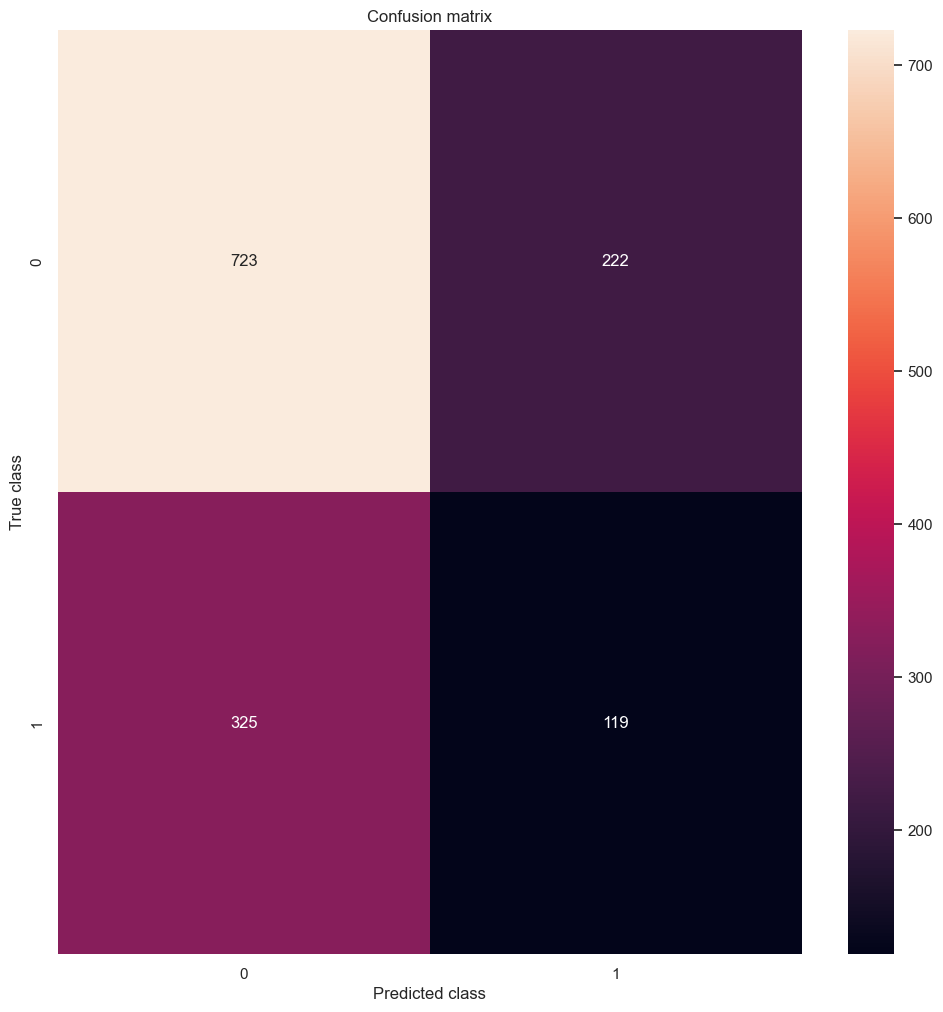

In [220]:
target = data_aids['infected']
features = data_aids[['oprior', 'treat']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

os_us = SMOTETomek(sampling_strategy=0.5)
X_train, y_train = os_us.fit_resample(X_train, y_train)

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

param_grid = {
    'n_neighbors': [3, 5, 7, 10], 
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  
}

score_metrics = {'f1': 'f1',
                 'accuracy': 'accuracy',
                 'recall': 'recall'}

clf = GridSearchCV(estimator=KNeighborsClassifier(),
                   param_grid=param_grid,
                   scoring=score_metrics,
                   refit='accuracy',
                   cv=5,
                   n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Reporte completo
print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Los resultados para el modelo KNeighborsClassifier muestran un accuracy general del 61%, lo que indica que el modelo clasifica correctamente el 61% de los casos en el conjunto de prueba. Para la clase "0" (no infectado), el modelo presenta una precisión de 69% y un recall de 77%, lo que significa que identifica bien los casos no infectados y es eficaz en detectarlos. Para la clase "1" (infectado), la precisión es de 35% y el recall es de 27%, mostrando que el modelo tiene dificultades significativas para identificar correctamente los casos infectados, con una alta tasa de falsos negativos. El f1-score para la clase "1" es 0.30, reflejando un bajo equilibrio entre precisión y recall para la clase minoritaria. El promedio macro y ponderado indican una capacidad moderada del modelo, con un desempeño significativamente mejor en la clase mayoritaria.

## **CONCLUSIONES**
A pesar de que se tienen diferentes conjuntos de características para cada modelo que optimizan la exactitud, se encuentran variables como "homo" la actividad homosexual y "drugs" la utilización de drogas mediante la inyección que persisten como características predictoras, sin embargo, una que en especial destaca es "trt" o indicador de tratamiento "treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)".

Precisión de Clase Mayoritaria (0): Los modelos iniciales (RandomForest y LogisticRegression) tienen una precisión alta para la clase "0" (70% y 71%, respectivamente). Sin embargo, el KNeighborsClassifier también es efectivo con una precisión de 69%. El RandomForest y el KNeighborsClassifier tienen un recall ligeramente menor en comparación con la regresión logística, pero aún son efectivos con valores de 87% y 77%, respectivamente. Precisión y Recall de Clase Minoritaria (1): La regresión logística tiene la mejor precisión para la clase minoritaria (48%) y un recall de 20%, que es mejor que los otros modelos. El RandomForest y el KNeighborsClassifier tienen una precisión similar para la clase minoritaria (47% y 35%, respectivamente), pero un recall aún más bajo (23% y 27%, respectivamente). F1-Score de Clase Minoritaria (1): La regresión logística tiene un F1-score moderado (0.28) para la clase minoritaria, mientras que el RandomForest (0.31) y el KNeighborsClassifier (0.30) tienen puntuaciones ligeramente mayores.

La regresión logística muestra un buen desempeño en el promedio ponderado de precisión, recall y F1-score, lo que sugiere que maneja mejor el balance entre clases en términos generales. No obstante, RandomForest y KNeighborsClassifier también tienen un rendimiento ponderado similar, indicando una capacidad moderada para manejar la clase minoritaria.

La regresión logística es el mejor modelo basado en el equilibrio entre precisión y recall para la clase minoritaria y el rendimiento general. A pesar de su buen desempeño, la identificación de la clase minoritaria sigue siendo un desafío

El modelo seleccionado, regresión logística ofrece una solución de clasificación para el problema planteado, sin embargo, cuenta con una gran oportunidad de mejora para un mejor desempeño, estas oportunidades pueden ir desde la ingeniería de las características, el manejo del balance de etiquetas y la aplicación de modelos avanzados. En terminos general, se logra la construcción de un modelo que presenta deficiencias en el manejo optimo de los casos de clasificación. 


**Posibles Soluciones para Mejorar el Rendimiento**

Técnicas de Balanceo Adicionales: Modificar el umbral de decisión para la clase minoritaria para mejorar el recall sin comprometer demasiado la precisión.
Características Adicionales: Explorar la adición de nuevas características o la ingeniería de características para mejorar el modelo.
Regularización: Aplicar técnicas de regularización para evitar el sobreajuste y mejorar el rendimiento en datos desequilibrados.
Modelos Avanzados: Probar otros modelos como Support Vector Machines (SVM) con técnicas de kernel o XGBoost, que a menudo manejan bien los desbalances en los datos. En aplicaciones en la red para el analisis de set, se implementan modelos como CatBoostClassifier y GaussianNB que permiten tener un mejor rendimeinto. 
Implementar estas soluciones puede ayudar a mejorar el desempeño general y abordar el desbalance de clases más efectivamente.